In [1]:
import pandas as pd

### Merging 12 months of sales data into a single file

In [2]:
from IPython.core.magic import register_cell_magic
from IPython.display import HTML, display

@register_cell_magic
def bgc(color, cell=None):
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

In [3]:
import os

# Specify the directory containing your CSV files
directory = 'Sales_Data/'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

csv_files


['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'merged_file.csv']

In [4]:

# Read each CSV file and concatenate them into a single DataFrame
dfs = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]
merged_df = pd.concat(dfs, ignore_index=True)

# Export the merged DataFrame to a CSV file
merged_df.to_csv(directory+'merged_file.csv', index=False)
print(merged_df)

       Order ID                 Product Quantity Ordered Price Each  \
0        295665      Macbook Pro Laptop                1       1700   
1        295666      LG Washing Machine                1      600.0   
2        295667    USB-C Charging Cable                1      11.95   
3        295668        27in FHD Monitor                1     149.99   
4        295669    USB-C Charging Cable                1      11.95   
...         ...                     ...              ...        ...   
934245   222905  AAA Batteries (4-pack)                1       2.99   
934246   222906        27in FHD Monitor                1     149.99   
934247   222907    USB-C Charging Cable                1      11.95   
934248   222908    USB-C Charging Cable                1      11.95   
934249   222909  AAA Batteries (4-pack)                1       2.99   

            Order Date                        Purchase Address  
0       12/30/19 00:01  136 Church St, New York City, NY 10001  
1       12/29/19 

In [5]:
dfs = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]
type([x for x in dfs])

list

In [6]:
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
934245,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
934246,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
934247,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
934248,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [7]:
#[x for x in merged_df if x['Order ID'] == 176558]
merged_df[merged_df['Order ID'] == '295665']

print(merged_df['Order ID'].dtypes)

object


##### Q1 What was the best month for sales? How much was earned that month?

In [8]:
#max(int(x) for x in merged_df['Order ID',skiprows=1])
#merged_df['Order ID'] = pd.to_numeric(merged_df['Order ID'], errors='coerce')

#max_order_id_row = merged_df[merged_df['Price Each'] == merged_df['Order ID'].max()]

merged_df.dropna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
934245,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
934246,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
934247,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
934248,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [9]:
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')

/var/folders/35/vw_j2d_n7kj95gf_rltgld9h0000gn/T/ipykernel_16127/1338565842.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')


In [10]:
merged_df['Month'] = merged_df['Order Date'].dt.to_period('M')


merged_df['Month']

0         2019-12
1         2019-12
2         2019-12
3         2019-12
4         2019-12
           ...   
934245    2019-06
934246    2019-06
934247    2019-06
934248    2019-06
934249    2019-06
Name: Month, Length: 934250, dtype: period[M]

In [11]:
merged_df['Brutto'] = pd.to_numeric(merged_df['Price Each'], errors='coerce') * pd.to_numeric(merged_df['Quantity Ordered'], errors='coerce')



In [12]:

monthly_sales = merged_df.groupby('Month')['Brutto'].sum()



print(monthly_sales.idxmax())


2019-12


In [13]:
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95
...,...,...,...,...,...,...,...,...
934245,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2019-06,2.99
934246,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",2019-06,149.99
934247,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019-06,11.95
934248,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",2019-06,11.95


In [14]:
import matplotlib.pyplot as plt

# Convert index to datetime dtype
monthly_sales.index = monthly_sales.index.to_timestamp()




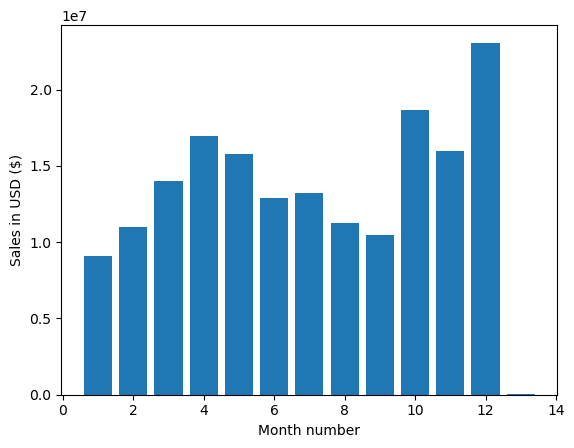

In [20]:
# Extracting data from the monthly_sales Series
months = monthly_sales.index
sales = monthly_sales.values

# Creating the bar chart
plt.bar(range(1,14), sales, width=0.8)  # Adjust the width parameter

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


##### Axis example:

In [37]:
import pandas as pd

# Create the DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, None, 9]})
print(df)
print()
# Sum along axis=0 (rows)
sum_row = df.sum(axis=0)
print("Sum along rows (axis=0):\n", sum_row)

# Sum along axis=1 (columns)
sum_column = df.sum(axis=1)
print("\nSum along columns (axis=1):\n", sum_column)


print(df.isna().any(axis=1))

   A  B    C
0  1  4  7.0
1  2  5  NaN
2  3  6  9.0

Sum along rows (axis=0):
 A     6.0
B    15.0
C    16.0
dtype: float64

Sum along columns (axis=1):
 0    12.0
1     7.0
2    18.0
dtype: float64
0    False
1     True
2    False
dtype: bool


##### Cleaning up from the video:

In [41]:
len(merged_df)
#nan_df = merged_df[.any(axis)]

nan_df = merged_df[merged_df.isna().any(axis=1)]
display(nan_df.head())

merged_df=merged_df.dropna(how='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto
254,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaT,NaN
264,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
648,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
680,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
705,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaT,NaN


##### Q2: What city had the highest number os sales

In [44]:
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,1700.00
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,11.95


In [46]:
! pip install usaddress

  Obtaining dependency information for usaddress from https://files.pythonhosted.org/packages/d3/6c/3da44f6f41834cd4c2c0fadf29d11e8493bcf80811f5bd9ec542a08b9996/usaddress-0.5.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for probableparsing from https://files.pythonhosted.org/packages/e1/6b/91255cbf739a835df41af530a36798397d70342d152b773b5b0fe3001843/probableparsing-0.0.1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 478.3/478.3 kB 3.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 2.8 MB/s eta 0:00:00
  Created wheel for python-crfsuite: filename=python_crfsuite-0.9.10-cp311-cp311-macosx_11_0_arm64.whl size=161900 sha256=5bd1d025997dbc078da3d362e11a5286904696c8cfad05c7ac4d3f6c2926f978
  Stored in directory: /Users/zsomborveres-lakos/Library/Caches/pip/wheels/c0/a0/14/86127d22cfcc7f72987d6a9c3f7baa22da0d8f70303600cd01
Successfully built python-crfsuite


In [133]:
import usaddress

cities = usaddress.tag(merged_df['Purchase Address'].iloc[0])[0]['PlaceName']
merged_df['City'] =merged_df['Purchase Address'].apply(lambda x: usaddress.tag(x)[0][0]['PlaceName'])
print()

KeyError: 0

In [108]:
merged_df['Cities']

filtered_df = merged_df[merged_df['Cities'] != 'New York City']
filtered_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Brutto,Cities
